## Day 35 Lecture 1 Assignment

In this assignment, we will learn about gradient boosting. We will use a dataset describing survival rates after breast cancer surgery loaded below and analyze the model generated for this dataset.

In [ ]:
!pip install scikit-optimize

In [ ]:
%matplotlib inline

import math

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVC, SVR
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer

from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder

from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, mean_absolute_error, plot_confusion_matrix, classification_report

from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

In [ ]:
# Attributes:
# Age of patient at time of operation (numerical)
# Patient's year of operation (year - 1900, numerical)
# Number of positive axillary nodes detected (numerical)
# Survival status (class attribute)
#  -- 1 = the patient survived 5 years or longer
#  -- 2 = the patient died within 5 year

cols = ['age', 'op_year', 'nodes', 'survival']
cancer = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/haberman.data', names=cols)

In [ ]:
cancer.head()

,age,op_year,nodes,survival
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


Check for missing data and remove all rows containing missing data

In [ ]:
# answer below:
cancer.info()

missing_values = cancer.isnull().sum()

missing_values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       306 non-null    int64
 1   op_year   306 non-null    int64
 2   nodes     306 non-null    int64
 3   survival  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


age         0
op_year     0
nodes       0
survival    0
dtype: int64

Adjust the target variable so that it has values of either 0 or 1

In [ ]:
# answer below:
cancer.survival.replace({2:0}, inplace=True)

In [ ]:
cancer.survival.value_counts()

1    225
0     81
Name: survival, dtype: int64

Split the data into train and test (20% in test)

In [ ]:
# answer below:
X = cancer.drop('survival', 1)
y = cancer.survival

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

Create a gradient boosted classification algorithm with a learning rate of 0.01 and max depth of 5. Report the accuracy.

In [ ]:
# answer below:
gbc = GradientBoostingClassifier(learning_rate=0.01, max_depth=5, n_iter_no_change=1000, n_estimators=10000)

gbc.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.01, loss='deviance', max_depth=5,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=10000,
                           n_iter_no_change=1000, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
def get_scores(model, X_train, X_test, y_train, y_test, verbose=False):
  if verbose:
    print(f'Training Scores: {model.score(X_train, y_train)}')
    print(f'Test Scores: {model.score(X_test, y_test)}')
  return model.score(X_train, y_train), model.score(X_test, y_test)

def get_class_report(model, X_train, X_test, y_train, y_test):
  print(f'Training Report:\n {classification_report(y_train, model.predict(X_train))}')
  print(f'Test Report:\n {classification_report(y_test, model.predict(X_test))}')

In [ ]:
get_scores(gbc, X_train, X_test, y_train, y_test, verbose=True)
get_class_report(gbc, X_train, X_test, y_train, y_test)

Training Scores: 0.9590163934426229
Test Scores: 0.6774193548387096
Training Report:
               precision    recall  f1-score   support

           0       0.95      0.89      0.92        65
           1       0.96      0.98      0.97       179

    accuracy                           0.96       244
   macro avg       0.96      0.94      0.95       244
weighted avg       0.96      0.96      0.96       244

Test Report:
               precision    recall  f1-score   support

           0       0.38      0.38      0.38        16
           1       0.78      0.78      0.78        46

    accuracy                           0.68        62
   macro avg       0.58      0.58      0.58        62
weighted avg       0.68      0.68      0.68        62



Print the confusion matrix for the test data. What do you notice about our predictions?

Training Report:
               precision    recall  f1-score   support

           0       0.95      0.89      0.92        65
           1       0.96      0.98      0.97       179

    accuracy                           0.96       244
   macro avg       0.96      0.94      0.95       244
weighted avg       0.96      0.96      0.96       244

Test Report:
               precision    recall  f1-score   support

           0       0.38      0.38      0.38        16
           1       0.78      0.78      0.78        46

    accuracy                           0.68        62
   macro avg       0.58      0.58      0.58        62
weighted avg       0.68      0.68      0.68        62



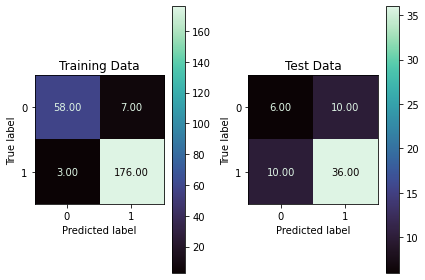

In [ ]:
# answer below:
get_class_report(gbc, X_train, X_test, y_train, y_test)
ax1 = plt.subplot(121)
plot_confusion_matrix(gbc, X_train, y_train, values_format='.2f', ax=ax1, cmap='mako')
plt.title('Training Data')

ax2 = plt.subplot(122)
plot_confusion_matrix(gbc, X_test, y_test, values_format='.2f', ax=ax2, cmap='mako')
plt.title('Test Data')

plt.tight_layout()
plt.show()

Print the confusion matrix for a learning rate of 1 and a learning rate of 0.5. What do you see now that stands out to you in the confusion matrix?

In [ ]:
# answer below:
gbc = GradientBoostingClassifier(learning_rate=1, max_depth=5, n_iter_no_change=1000, n_estimators=10000)

gbc.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=1, loss='deviance', max_depth=5,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=10000,
                           n_iter_no_change=1000, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

Training Scores: 0.9672131147540983
Test Scores: 0.6774193548387096
Training Report:
               precision    recall  f1-score   support

           0       0.95      0.92      0.94        65
           1       0.97      0.98      0.98       179

    accuracy                           0.97       244
   macro avg       0.96      0.95      0.96       244
weighted avg       0.97      0.97      0.97       244

Test Report:
               precision    recall  f1-score   support

           0       0.39      0.44      0.41        16
           1       0.80      0.76      0.78        46

    accuracy                           0.68        62
   macro avg       0.59      0.60      0.59        62
weighted avg       0.69      0.68      0.68        62



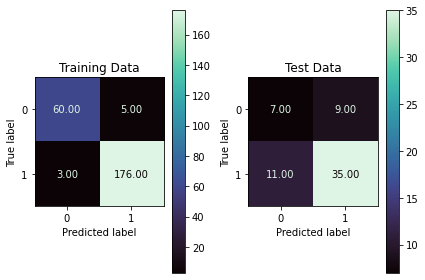

In [ ]:
get_scores(gbc, X_train, X_test, y_train, y_test, verbose=True)
get_class_report(gbc, X_train, X_test, y_train, y_test)
ax1 = plt.subplot(121)
plot_confusion_matrix(gbc, X_train, y_train, values_format='.2f', ax=ax1, cmap='mako')
plt.title('Training Data')

ax2 = plt.subplot(122)
plot_confusion_matrix(gbc, X_test, y_test, values_format='.2f', ax=ax2, cmap='mako')
plt.title('Test Data')

plt.tight_layout()
plt.show()

In [ ]:
gbc = GradientBoostingClassifier(learning_rate=0.5, max_depth=5, n_iter_no_change=1000, n_estimators=10000)

gbc.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.5, loss='deviance', max_depth=5,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=10000,
                           n_iter_no_change=1000, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

Training Scores: 0.9508196721311475
Test Scores: 0.6612903225806451
Training Report:
               precision    recall  f1-score   support

           0       0.91      0.91      0.91        65
           1       0.97      0.97      0.97       179

    accuracy                           0.95       244
   macro avg       0.94      0.94      0.94       244
weighted avg       0.95      0.95      0.95       244

Test Report:
               precision    recall  f1-score   support

           0       0.27      0.19      0.22        16
           1       0.75      0.83      0.78        46

    accuracy                           0.66        62
   macro avg       0.51      0.51      0.50        62
weighted avg       0.62      0.66      0.64        62



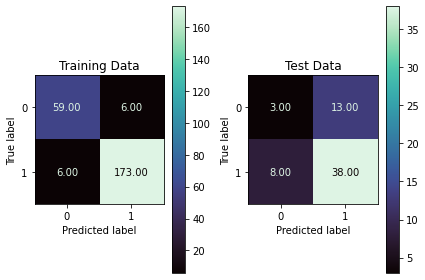

In [ ]:
get_scores(gbc, X_train, X_test, y_train, y_test, verbose=True)
get_class_report(gbc, X_train, X_test, y_train, y_test)
ax1 = plt.subplot(121)
plot_confusion_matrix(gbc, X_train, y_train, values_format='.2f', ax=ax1, cmap='mako')
plt.title('Training Data')

ax2 = plt.subplot(122)
plot_confusion_matrix(gbc, X_test, y_test, values_format='.2f', ax=ax2, cmap='mako')
plt.title('Test Data')

plt.tight_layout()
plt.show()

Perform a grid search for the optimal learning rate. Instead of accuracy, use a metric that will help your model predict the positive class.

In [ ]:
# answer below:
gbc = GradientBoostingClassifier(n_iter_no_change=100, n_estimators=10000)

params = {'learning_rate': Real(0.1, 0.9),
          'max_depth': Integer(3,15),
          'subsample': Real(0.5, 1.0),
          'max_features': Categorical([None, 'sqrt', 0.75])}

clf = BayesSearchCV(gbc, params, cv=3, scoring='recall', n_iter=25, n_jobs=2, verbose=True)

clf.fit(X_train, y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   3 out of   3 | elapsed:    1.6s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=2)]: Done   3 out of   3 | elapsed:    0.4s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=2)]: Done   3 out of   3 | elapsed:    0.3s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=2)]: Done   3 out of   3 | elapsed:    0.3s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=2)]: Done   3 out of   3 | elapsed:    0.4s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=2)]: Done   3 out of   3 | elapsed:    0.3s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=2)]: Done   3 out of   3 | elapsed:    0.5s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=2)]: Done   3 out of   3 | elapsed:    0.3s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=2)]: Done   3 out of   3 | elapsed:    0.3s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   3 out of   3 | elapsed:    0.4s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   3 out of   3 | elapsed:    0.2s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   3 out of   3 | elapsed:    0.3s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   3 out of   3 | elapsed:    0.6s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   3 out of   3 | elapsed:    0.2s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   3 out of   3 | elapsed:    0.3s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   3 out of   3 | elapsed:    0.2s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   3 out of   3 | elapsed:    0.2s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   3 out of   3 | elapsed:    0.2s finished
/usr/local/lib/python3.6/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   3 out of   3 | elapsed:    0.3s finished
/usr/local/lib/python3.6/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   3 out of   3 | elapsed:    0.2s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   3 out of   3 | elapsed:    0.6s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   3 out of   3 | elapsed:    0.4s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   3 out of   3 | elapsed:    0.3s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   3 out of   3 | elapsed:    0.5s finished
/usr/local/lib/python3.6/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   3 out of   3 | elapsed:    0.3s finished


BayesSearchCV(cv=3, error_score='raise',
              estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                   criterion='friedman_mse',
                                                   init=None, learning_rate=0.1,
                                                   loss='deviance', max_depth=3,
                                                   max_features=None,
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=10000,
                                                   n_it...
    

In [ ]:
clf.best_params_

OrderedDict([('learning_rate', 0.1),
             ('max_depth', 3),
             ('max_features', 'sqrt'),
             ('subsample', 0.5)])

In [ ]:
for key in params.keys():
  print(f'{key} = {getattr(clf.best_estimator_, key)}')

learning_rate = 0.1
max_depth = 3
subsample = 0.5
max_features = sqrt


List the feature importances for the model with the optimal learning rate.

In [ ]:
# answer below:
feature_importance = pd.DataFrame({'columns': X.columns, 'importance_score':clf.best_estimator_.feature_importances_})
feature_importance.sort_values('importance_score', ascending=False)

,columns,importance_score
2,nodes,0.392297
0,age,0.353092
1,op_year,0.254611
